### Singular Value Decomposition (SVD)

In [70]:
import numpy as np
A = np.array([[1, 3, 4], [2, 3, 5], [1, 2, 3], [5, 4, 6]])  # original matrix
print(A)

[[1 3 4]
 [2 3 5]
 [1 2 3]
 [5 4 6]]


In [72]:
# Singular value decomposition (SVD) A = U * S * Vh
U, s, Vh = np.linalg.svd(A, full_matrices=False)
print(U.shape, s.shape, Vh.shape)
print(s)  # singular values

(4, 3) (3,) (3, 3)
[12.26362747  2.11085464  0.38436189]


In [74]:
# Reconstruct the original matrix A
print(np.dot(np.dot(U, np.diag(s)), Vh))

[[1. 3. 4.]
 [2. 3. 5.]
 [1. 2. 3.]
 [5. 4. 6.]]


In [76]:
# Reconstruct A using the first 2 columns (k = 2) from U
k = 2
print(np.round(np.dot(np.dot(U[:, :k], np.diag(s[:k])), Vh[:k, :]), 1))

[[1.  2.8 4.1]
 [2.  3.2 4.8]
 [1.  2.  3. ]
 [5.  3.9 6. ]]


In [78]:
# Reconstruct A using the first column (k = 1) from U
k = 1
print(np.round(np.dot(np.dot(U[:, :k], np.diag(s[:k])), Vh[:k, :]), 1))

[[2.1 2.5 3.7]
 [2.6 3.1 4.6]
 [1.6 1.8 2.8]
 [3.7 4.3 6.5]]


### Comentario

En este ejercicio se ilustra el funcionamiento del algoritmo de descomposición en valores singulares (SVD) aplicado a una matriz pequeña `A`. 

- Se realiza la descomposición `A = U * S * Vh`, donde `U` y `Vh` son matrices ortogonales y `S` contiene los valores singulares.
- Los valores singulares (`s`) indican la importancia de cada componente en la representación de la matriz original.
- Se reconstruye la matriz original `A` utilizando todos los valores singulares, obteniendo así la matriz original sin pérdida de información.
- Posteriormente, se reconstruye la matriz usando solo las primeras 2 columnas (componentes principales), lo que reduce la dimensionalidad y retiene la mayor parte de la información relevante (aproximadamente el 97% según los valores singulares).
- Finalmente, se muestra la reconstrucción usando únicamente el primer valor singular, donde ya se pierde más información, pero se obtiene una aproximación simplificada.

Este ejercicio permite entender cómo SVD puede usarse para reducir dimensionalidad y compresión de datos, manteniendo las características principales con menor cantidad de información.

### Análisis de factores

In [83]:
# Use the Iris dataset and the FactorAnalysis class
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis

iris = load_iris()  # load the data
X = iris.data  # store predictive features
Y = iris.target
cols = [s[:12].strip() for s in iris.feature_names]

# Use FactorAnalysis with 4 factors and fit data
factor = FactorAnalysis(n_components = 4).fit(X)

In [85]:
import pandas as pd
# Observe the components attribute, which shows relationship
# between new factors (rows) and original variables (columns)
print(pd.DataFrame(factor.components_, columns = cols))

   sepal length  sepal width  petal length  petal width
0      0.706989    -0.158005      1.654236      0.70085
1      0.115161     0.159635     -0.044321     -0.01403
2     -0.000000     0.000000      0.000000      0.00000
3     -0.000000     0.000000      0.000000     -0.00000


### Comentario

En este ejercicio se aplica el Análisis Factorial (Factor Analysis) al dataset Iris para identificar factores latentes que expliquen la correlación entre las variables originales.

- Se importan las funciones necesarias y se carga el dataset Iris.
- Se usa la clase `FactorAnalysis` de scikit-learn para extraer 4 factores principales de los datos.
- El resultado muestra la matriz de componentes, donde cada fila corresponde a un factor y cada columna a una variable original.
- Se observa que solo dos factores tienen cargas significativas en las variables originales, lo que indica que estos factores resumen la mayor parte de la variabilidad en las características de Iris.
- La representación gráfica indica cómo cada variable puede interpretarse como una combinación lineal de estos factores, facilitando la reducción dimensional y la interpretación del dataset.

Este análisis es útil para descubrir estructuras subyacentes en los datos y simplificar modelos manteniendo la información relevante.


### Principal Component Analysis (PCA)

In [88]:
# Use the Iris dataset and the PCA class
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()  # load the data
X = iris.data  # store predictive features
Y = iris.target
cols = [s[:12].strip() for s in iris.feature_names]

# Use PCA and fit data
pca = PCA().fit(X)
print('Explained variance by each component: %s' % pca.explained_variance_ratio_)

Explained variance by each component: [0.92461872 0.05306648 0.01710261 0.00521218]


In [90]:
import pandas as pd
# Observe the components_ attribute, which shows relationship
# between components (rows) and original variables (columns)
print(pd.DataFrame(pca.components_, columns=iris.feature_names))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.361387         -0.084523           0.856671          0.358289
1           0.656589          0.730161          -0.173373         -0.075481
2          -0.582030          0.597911           0.076236          0.545831
3           0.315487         -0.319723          -0.479839          0.753657


### Comentario

En este ejercicio se utiliza el dataset Iris para aplicar Análisis de Componentes Principales (PCA). Se importan las librerías necesarias y se carga el conjunto de datos. El PCA se ajusta a los datos de características predictivas (`X`).

Los resultados muestran la proporción de varianza explicada por cada componente principal. Se observa que los dos primeros componentes explican aproximadamente el 98% de la varianza total del dataset, lo que indica que es posible reducir la dimensionalidad del conjunto de datos a solo dos componentes sin perder demasiada información.

Además, se imprime la matriz de componentes que indica cómo cada componente principal está relacionado con las variables originales. Esto ayuda a interpretar qué características originales influyen más en cada componente, facilitando la comprensión del patrón subyacente en los datos.


### Algoritmo t-SNE

In [94]:
# Digits contains handwritten numbers, each
# handwritten number is an 8*8 matrix of values
# ranging from 0 (black) to 1 (white).
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
ground_truth = digits.target

In [96]:
# TSNE algorithm is in sklearn
from sklearn.manifold import TSNE
# The algorithm has several parameters to set
tsne = TSNE(n_components = 2, init = 'pca', 
            random_state = 0, perplexity = 50, 
            early_exaggeration = 25, n_iter = 300)

Tx = tsne.fit_transform(X)

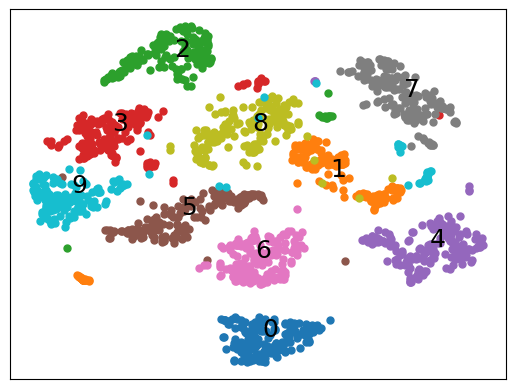

In [97]:
import numpy as np
import matplotlib.pyplot as plt
plt.xticks([], [])
plt.yticks([], [])

for target in np.unique(ground_truth):
    selection = ground_truth==target
    X1, X2 = Tx[selection, 0], Tx[selection, 1]
    c1, c2 = np.median(X1), np.median(X2)
    plt.plot(X1, X2, 'o', ms = 5)
    plt.text(c1, c2, target, fontsize = 18)

### Comentario

En este ejercicio se trabaja con el dataset de dígitos escritos a mano, donde cada número es representado como una matriz de 8x8 píxeles con valores de intensidad entre 0 (negro) y 1 (blanco).

Se utiliza el algoritmo t-SNE para reducir la dimensionalidad de los datos a dos dimensiones, permitiendo visualizar la distribución de los dígitos en un espacio 2D. El algoritmo tiene parámetros configurables como la cantidad de componentes, la inicialización, la perplexidad y el número de iteraciones.

La visualización resultante muestra agrupaciones claras de algunos dígitos como 0, 6 o 4, que son fácilmente distinguibles. Sin embargo, algunos dígitos como 3 y 9, o 5 y 8, pueden solaparse o confundirse más fácilmente, lo que refleja la dificultad del reconocimiento en estos casos.

Este análisis es útil para entender cómo se separan o agrupan los datos de alta dimensionalidad en un espacio reducido, facilitando tareas de clasificación o detección de patrones.


### Reconocimiento facial con PCA

In [5]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=101)

# Divide the set of labeled images into a training and a test set.
train_faces = dataset.data[:350, :]
test_faces = dataset.data[350:, :]
train_answers = dataset.target[:350]
test_answers = dataset.target[350:]

n_components = 25  # The decomposition creates n_components new variables
# The whitening option removes some constant noise from images.
Rpca = PCA(n_components=n_components, whiten=True)
Rpca.fit(train_faces)
print('Explained variance by %i components: %.3f'
      % (n_components, np.sum(Rpca.explained_variance_ratio_)))
compressed_train_faces = Rpca.transform(train_faces)
compressed_test_faces = Rpca.transform(test_faces)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\pablo\scikit_learn_data
Explained variance by 25 components: 0.794


The represented person is subject 17


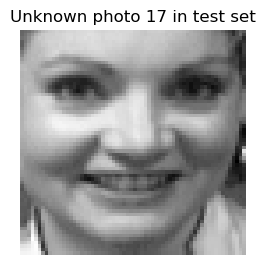

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

photo = 17  # choose a photo from the test set
print('The represented person is subject %i' % photo)  # we know the associated person ID.

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Unknown photo ' + str(photo) + ' in test set')
plt.imshow(test_faces[photo].reshape(64, 64),
           cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [9]:
# From the compressed test set, take the data associated with photo,
# and subtract it from the compressed training set.
mask = compressed_test_faces[photo]
squared_errors = np.sum((compressed_train_faces - mask)**2, axis=1)
# The most similar photos are the ones with the least-squared errors.
minimum_error_face = np.argmin(squared_errors)
most_resembling = list(np.where(squared_errors < 20)[0])
print('Best resembling subject in training set: %i' % minimum_error_face)

Best resembling subject in training set: 170


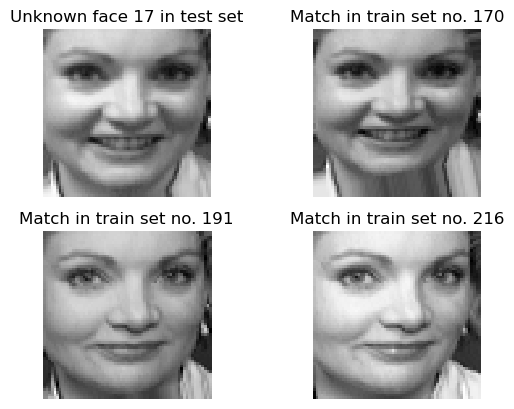

In [11]:
# Let's display photo 17 from the test set together with
# the top three resembling images from the training set.
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Unknown face ' + str(photo) + ' in test set')
plt.imshow(test_faces[photo].reshape(64, 64),
           cmap=plt.cm.gray, interpolation='nearest')

for k, m in enumerate(most_resembling[:3]):
    plt.subplot(2, 2, 2 + k)
    plt.title('Match in train set no. ' + str(m))
    plt.axis('off')
    plt.imshow(train_faces[m].reshape(64, 64),
               cmap=plt.cm.gray, interpolation='nearest')

plt.show()

### Comentario

En este ejercicio se trabaja con el dataset Olivetti Faces, que contiene imágenes faciales de 40 personas diferentes. El objetivo es reducir la dimensionalidad de las imágenes utilizando PCA para captar la mayor varianza posible con menos variables.

Primero, se realiza la transformación y reducción de las imágenes con PCA, seleccionando 25 componentes principales que explican aproximadamente el 79.4% de la varianza total. Esto significa que gran parte de la información original se conserva en un espacio de menor dimensión, facilitando el análisis y comparación.

A continuación, se selecciona una imagen desconocida del conjunto de prueba y se muestra visualmente. Posteriormente, se calcula la similitud entre esta imagen comprimida y las imágenes del conjunto de entrenamiento usando el error cuadrático mínimo. Se identifica la imagen del entrenamiento más parecida a la imagen de prueba.

Finalmente, se muestran juntas la imagen de prueba y las tres imágenes más similares encontradas en el conjunto de entrenamiento. Esto permite verificar visualmente cómo el método PCA combinado con la comparación por error cuadrático es capaz de reconocer a la misma persona en diferentes imágenes, incluso si varían la pose o la iluminación. La imagen más similar resulta ser simplemente una versión escalada de la imagen de prueba, lo que confirma la eficacia del método.

### Extracción de temas con NMF

In [15]:
# Goal: to extract topics and keywords from a collection of texts.
# Use the fetch_20newsgroups dataset, which contains posts.
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle = True,
                             categories = ['misc.forsale'],
                             remove = ('headers', 'footers', 'quotes'),
                             random_state = 101)

print('Posts: %i' % len(dataset.data))

# Use the non-negative matrix factorization (NMF) decomposition algorithm.
# The TfidfVectorizer class is used to remove stop (common) words such as 'the' or 'and'.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2,
                             stop_words = 'english')
tfidf = vectorizer.fit_transform(dataset.data)
n_topics = 5 # Set how many topics to extract.
nmf = NMF(n_components = n_topics, random_state = 101).fit(tfidf)

Posts: 585


In [27]:
feature_names = vectorizer.get_feature_names_out()
n_top_words = 15  # set how many keywords to consider per topic.
# Show the topics in order, accompanied by their most representative keywords.
for topic_idx, topic in enumerate(nmf.components_):
    print('Topic #%d:' % (topic_idx + 1),)
    topics = topic.argsort()[:-n_top_words - 1:-1]
    print(' '.join([feature_names[i] for i in topics]))



Topic #1:
condition excellent asking offer best car old new sale 10 miles 000 tape cd power
Topic #2:
00 50 dos 20 10 15 cover 1st new 25 price man 40 shipping comics
Topic #3:
drive hard card floppy monitor meg ram disk motherboard vga modem brand scsi color internal
Topic #4:
email looking game games send interested mail thanks like edu good want package price list
Topic #5:
shipping vcr works stereo obo included amp plus great volume unc mathes gibbs radley remotes


In [29]:
# Show the indexes of the top representative words for the first topic.
print(nmf.components_[0,:].argsort()[:-n_top_words - 1:-1])

[1075 1459  632 2463  740  888 2476 2415 2987   10 2305    1 3349  923
 2680]


In [31]:
# Extract the keyword related to a specific word_index.
word_index = 2463
print(vectorizer.get_feature_names_out()[word_index])

offer


### Comentario

En este apartado se realiza la extracción de temas utilizando la técnica de descomposición matricial no negativa (NMF), aplicada sobre la representación TF-IDF del conjunto de textos. 

Primero, se extraen las palabras más representativas de cada uno de los 5 temas identificados, mostrando las 15 palabras clave que caracterizan cada tópico. Estas palabras reflejan los conceptos centrales de cada tema, facilitando la interpretación cualitativa de los resultados.

A continuación, se muestran los índices de las palabras más representativas para el primer tema, lo que ayuda a entender la composición interna del modelo.

Finalmente, se verifica el término correspondiente a un índice específico para validar la correcta asignación de palabras clave a los temas. En este caso, la palabra "offer" está relacionada con el índice 2463, confirmando la extracción de términos relevantes para el análisis de temas en el corpus.

Este proceso permite resumir grandes colecciones de texto en temas estructurados, facilitando la comprensión y análisis posterior de la información textual.


### Recomendación de películas con SVD

In [14]:
# After downloading the ml-1m.zip file, check your working directory
# and then extract the file there.
import os
print(os.getcwd())

C:\Users\pablo\Desktop\MBA\1º\Herramientas Estadísticas\3.5


In [22]:
import pandas as pd

users = pd.read_table('ml-1m/users.dat', sep='::',
                     header=None, names=['user_id', 'gender', 'age', 'occupation', 'zip'], engine='python')

ratings = pd.read_table('ml-1m/ratings.dat', sep='::',
                       header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'], engine='python')

movies = pd.read_table('ml-1m/movies.dat', sep='::',
                      header=None, names=['movie_id', 'title', 'genres'], engine='python', encoding='latin-1')

movies = movies[['movie_id', 'title']]

# Convert movie_id to int in ratings and movies
ratings['movie_id'] = ratings['movie_id'].astype(int)
movies['movie_id'] = movies['movie_id'].astype(int)

MovieLens = pd.merge(pd.merge(ratings, users), movies)

In [24]:
# Using pandas, create a pivot table crossing information in rows
# about users and in columns about movie titles.
ratings_mtx_df = MovieLens.pivot_table(values='rating',
                                      index='user_id', columns='title', fill_value=0)

# A movie index keeps track about what movie each column represents.
movie_index = ratings_mtx_df.columns

In [26]:
# The TruncatedSVD class offers a more scalable algorithm than the linalg.svd class.
# Use it to reduce the datatable to n_components in order to speed up computation
# and reduce memory usage.
from sklearn.decomposition import TruncatedSVD
recom = TruncatedSVD(n_components=15, random_state=101)
R = recom.fit_transform(ratings_mtx_df.values.T)  # T refers to the matrix transpose

In [28]:
# Let's print out the index of a Star Wars movie and its SVD components.
movie = 'Star Wars: Episode V - The Empire Strikes Back (1980)'
movie_idx = list(movie_index).index(movie)  # column containing the movie.
print("movie index (column): %i" % movie_idx)
print('SVD components:\n', R[movie_idx])  # movie profile.

movie index (column): 3154
SVD components:
 [184.72254552 -17.77612872  47.33450866 -51.4664494  -47.92058216
 -17.65033116 -14.3574635  -12.82219207 -17.51347857  -5.46888807
   7.5430805   -0.57117869 -30.74032355   2.4088565  -22.50368497]


In [30]:
# Compute a correlation matrix for all movies, get the slice related to the selected movie (movie_idx),
# and find out inside it which are the movie titles that show higher correlations with movie_idx.
import numpy as np
correlation_matrix = np.corrcoef(R)
P = correlation_matrix[movie_idx]
min_correlation = 0.90  # minimum correlation requested
print(list(movie_index[(P > min_correlation) & (P < 1.01)]))  # exclude movie_idx

['Alien (1979)', 'Aliens (1986)', 'Back to the Future (1985)', 'Blade Runner (1982)', 'Die Hard (1988)', 'E.T. the Extra-Terrestrial (1982)', 'Indiana Jones and the Last Crusade (1989)', 'Jaws (1975)', 'Jurassic Park (1993)', 'Matrix, The (1999)', 'Princess Bride, The (1987)', 'Raiders of the Lost Ark (1981)', 'Star Wars: Episode I - The Phantom Menace (1999)', 'Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Star Wars: Episode VI - Return of the Jedi (1983)', 'Superman (1978)', 'Terminator 2: Judgment Day (1991)', 'Terminator, The (1984)']


### Comentario

En este ejercicio se aborda un sistema básico de recomendación de películas utilizando descomposición en valores singulares (SVD).

Primero, se carga el conjunto de datos MovieLens, que contiene información sobre usuarios, películas y calificaciones. Se construye una matriz de usuarios por películas con las calificaciones correspondientes, donde las filas representan usuarios y las columnas películas.

Luego, se aplica la técnica de descomposición SVD para reducir la dimensionalidad de esta matriz, obteniendo perfiles latentes para usuarios y películas. Esto permite capturar las relaciones subyacentes y patrones de preferencias, superando la sparsity (escasez) típica de los datos de recomendación.

Se selecciona una película específica, en este caso "Star Wars: Episode V - The Empire Strikes Back (1980)", y se identifica su perfil en el espacio latente de la descomposición.

A partir de ahí, se calcula la matriz de correlación entre todas las películas usando sus perfiles latentes. Esto permite medir qué películas son más similares en función de las preferencias de los usuarios.

Finalmente, se extrae la lista de películas con una correlación superior a 0.90 con la película seleccionada, lo que indica que son altamente similares y pueden recomendarse a quienes disfrutaron de la película base.

Este enfoque combina técnicas de reducción de dimensionalidad con análisis de correlación para proporcionar recomendaciones personalizadas basadas en patrones de calificación reales, demostrando una metodología eficaz para sistemas de recomendación colaborativos.


### Clusterización con K-Means

In [36]:
# The digits database consists of 1797 samples with 64
# features (each one being a pixel in an 8x8 image representing
# a handwritten number between 0 and 9).
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
true_labels = digits.target  # true digit in the image (0, ..., 9)
print(X.shape)

# Apply PCA on scaled data
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=30)  # Number of components
Cx = pca.fit_transform(scale(X))  # reduced dataset
print('Explained variance: %.2f' % sum(pca.explained_variance_ratio_) + "%")

# Apply K-Means on the reduced dataset, using n_clusters and re-starting
# the algorithm n_init times (each time using different starting centroids).
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=10, random_state=1)
clustering.fit(Cx)

(1797, 64)
Explained variance: 0.89%


KMeans(n_clusters=10, random_state=1)

In [38]:
# Compare the clustering result to the true labels in order to
# determine whether there is any correspondence.
# Caution: cluster labels might differ from real-life labels
# (e.g., true label 0 corresponds to cluster label 2).
import numpy as np
import pandas as pd

ms = np.column_stack((true_labels, clustering.labels_))
df = pd.DataFrame(ms, columns=['True labels', 'Clusters'])
pd.crosstab(df['True labels'], df['Clusters'], margins=True)

# Label numbers with split observations among different clusters
# are the handwritten numbers that are more difficult to cluster
# (e.g., numbers 1 and 8) and vice-versa (e.g., numbers 0 and 6).

Clusters,0,1,2,3,4,5,6,7,8,9,All
True labels,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,177,1,178
1,0,0,0,0,56,0,27,0,0,99,182
2,17,0,0,2,4,2,134,0,1,17,177
3,132,0,0,40,0,9,1,0,0,1,183
4,0,156,0,0,7,8,0,8,0,2,181
5,12,1,2,57,1,106,0,0,0,3,182
6,0,0,173,0,1,0,0,0,1,6,181
7,0,3,0,0,3,155,0,17,0,1,179
8,26,0,2,34,12,16,0,0,0,84,174


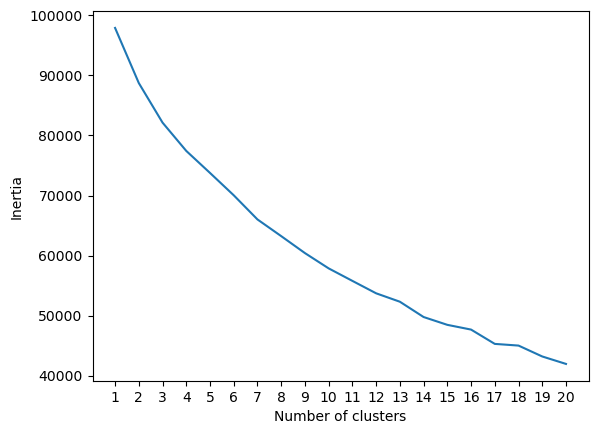

In [40]:
# A list holds the inertia values for each k
inertia = list()
x_range = range(1, 21)
for k in x_range:
    clustering = KMeans(n_clusters=k, n_init=10, random_state=1)
    clustering.fit(Cx)
    inertia.append(clustering.inertia_)

# Plot inertia vs. number of clusters to see where the elbow point occurs (it indicates a good candidate for the number of clusters).
import matplotlib.pyplot as plt
plt.figure()
plt.xticks(x_range)
plt.plot(x_range, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Comentario

En este ejercicio se realiza la búsqueda del número óptimo de clusters para el algoritmo K-Means aplicado sobre un conjunto de datos reducido mediante PCA. Para ello, se calcula la inercia (inertia) — que mide la suma de las distancias cuadráticas dentro de cada cluster — para diferentes números de clusters (desde 1 hasta 20).

El gráfico generado representa la inercia en función del número de clusters. La idea es identificar el "punto de codo" (elbow point), que indica el valor de k donde la disminución en la inercia se vuelve menos pronunciada. Este punto suele considerarse el número adecuado de clusters, balanceando la complejidad del modelo con la calidad de la segmentación.

En este caso, el punto de codo se observa alrededor de k = 9, sugiriendo que 9 clusters es una buena elección para segmentar los datos. Aunque en el problema específico se esperaría 10 clusters (uno por cada dígito), la elección puede variar debido a la naturaleza de los datos y la reducción dimensional previa.

Este método es fundamental en clustering porque permite seleccionar un número de clusters basado en la estructura intrínseca de los datos, evitando decisiones arbitrarias.


### Compresión de color con K-Means

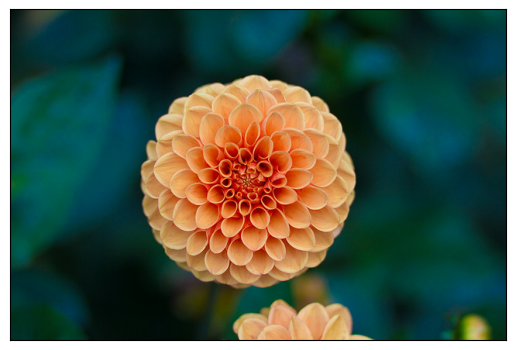

In [46]:
# Clustering can be used in color compression within images.
# An image with millions of colors can be compressed to a
# similar one using just a few number of colors
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [48]:
# The image is stored in a three-dimensional array of size (height, width, RGB),
# containing red/green/blue contributions as integers from 0 to 255.
flower.shape

(427, 640, 3)

In [50]:
# This set of pixels is a cloud of points in a 3D color space. The first two dim can be
# reshaped to [n_samples x n_features], and colors rescaled so the lie between 0 and 1.
data = flower / 255.0  # use 0..1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

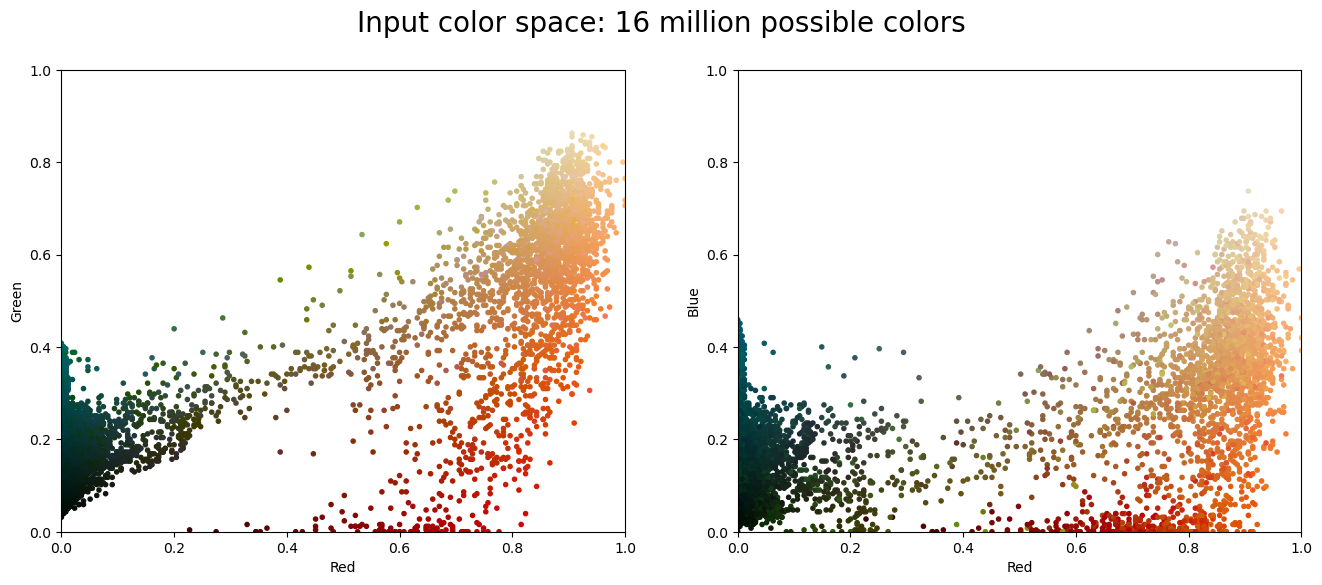

In [60]:
import numpy as np
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set_xlabel('Red')
    ax[0].set_ylabel('Green')
    ax[0].set_xlim(0, 1)
    ax[0].set_ylim(0, 1)
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set_xlabel('Red')
    ax[1].set_ylabel('Blue')
    ax[1].set_xlim(0, 1)
    ax[1].set_ylim(0, 1)
    fig.suptitle(title, size=20)

plot_pixels(data, title='Input color space: 16 million possible colors')

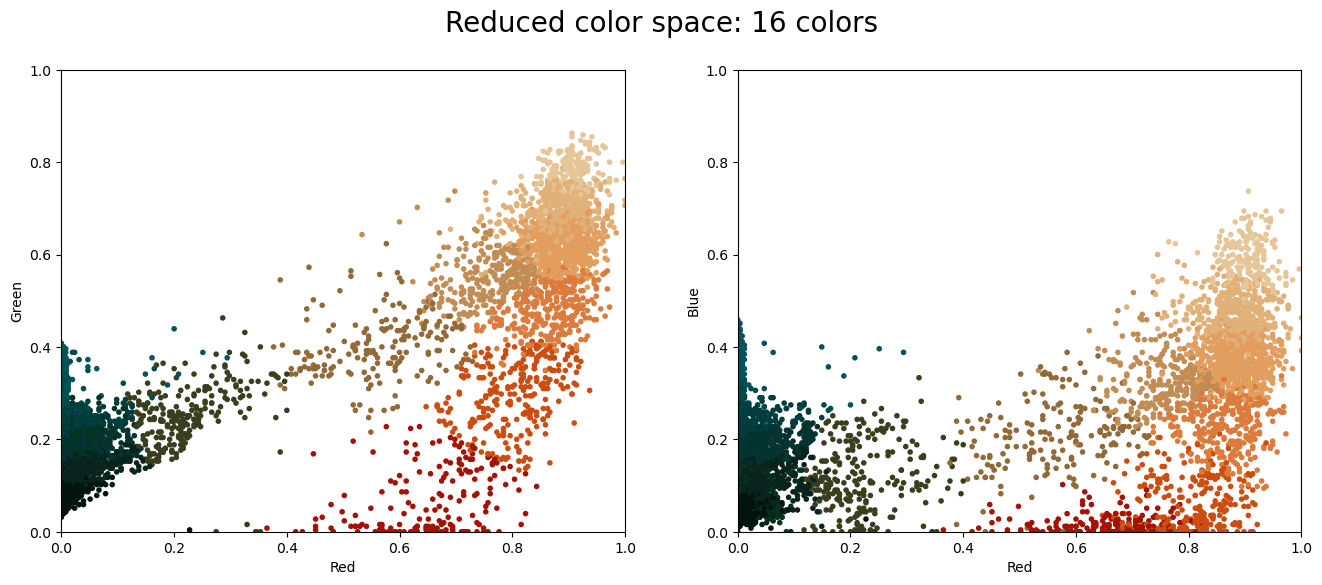

In [62]:
# Reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space.
# Since we are working with a large dataset, the mini batch k-means will be used.
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)  # 'mini batch k-means' is faster than k-means in large datasets
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

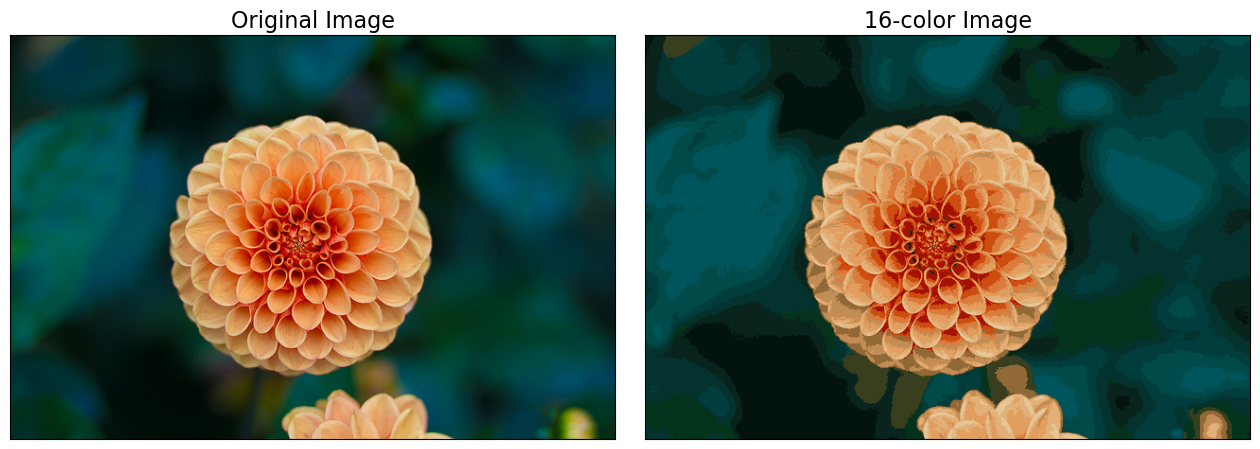

In [64]:
# The result is a re-coloring of the original pixels, where each pixel is assigned the color of its closest cluster center.
# We can plot these new colors in the image space to see the effect.
flower_recolored = new_colors.reshape(flower.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

### Comentario

Este ejercicio ilustra la aplicación de K-Means para la compresión de color en imágenes. Se parte de una imagen con aproximadamente 16 millones de colores diferentes, representados en un espacio tridimensional RGB. 

Primero, la imagen se carga y se transforma en un conjunto de datos donde cada píxel es un punto en este espacio 3D, normalizando los valores de color para trabajar con ellos eficientemente.

Luego, se visualiza la distribución original de los colores en los subespacios 2D del espacio RGB para entender la dispersión de los datos.

A continuación, se aplica K-Means con un número reducido de clusters (16 en este caso), que representa la cantidad final de colores a conservar. Este método agrupa colores similares, asignando a cada píxel el color del centroide del cluster al que pertenece.

Finalmente, se reconstruye la imagen con esta paleta reducida de colores y se visualizan lado a lado la imagen original y la comprimida. La imagen resultante conserva la esencia visual de la original pero con muchos menos colores, lo que implica una reducción significativa del espacio requerido para almacenarla o transmitirla.

Este método de compresión es útil para reducir el tamaño de archivos de imagen manteniendo la calidad perceptual y puede aplicarse en procesamiento de imágenes, gráficos por computadora y transmisión eficiente de datos visuales.